In [1]:
import sys
sys.path.insert(0, '../scripts')

import meals as ml
import tools as tl
import paths
from preprocessing import read_csv_clean

# ctrl_files = paths.reversal_ivsa_ctrl
# exp_files = paths.reversal_ivsa_exp

In [2]:
ctrl_meal_count = []
for path in paths.reversal_ivsa_ctrl:
    try:
        test = read_csv_clean(path)
        avg = round(len(ml.find_meals(test)) / ml.experiment_duration(test), 2)
        ctrl_meal_count.append(avg)
    except:
        pass
exp_meal_count = []
for path in paths.reversal_ivsa_exp:
    test = read_csv_clean(path)
    avg = round(len(ml.find_meals(test)) / ml.experiment_duration(test), 2)
    exp_meal_count.append(avg)

print(ctrl_meal_count, exp_meal_count)

[23.83, 22.67, 24.0, 37.4, 32.31, 33.59] [34.74, 36.4, 32.14, 35.78, 23.37, 28.79, 31.27]


/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CD1 IVSA/50/Reversal/FED000_032124_03.CSV


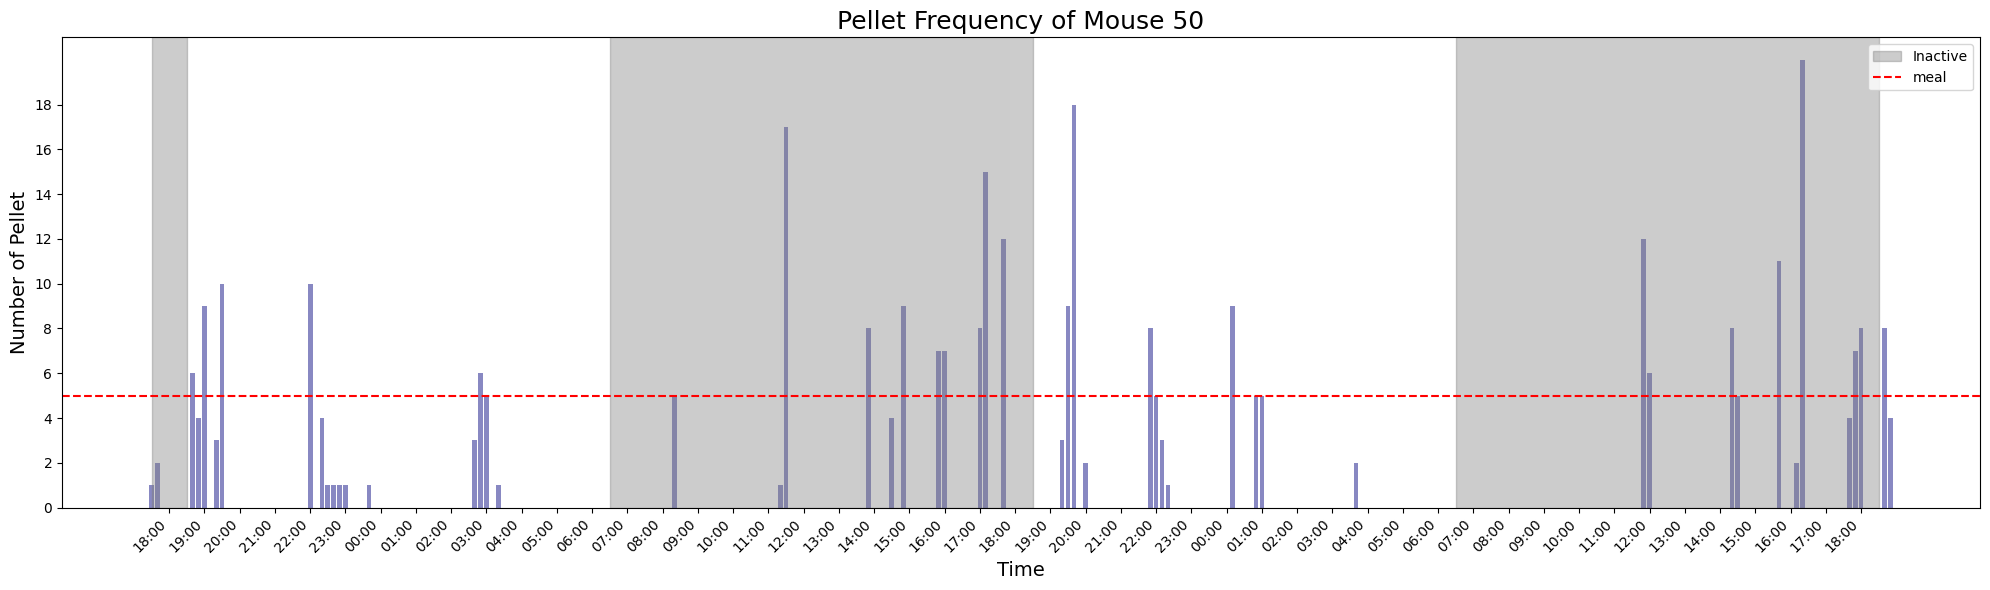

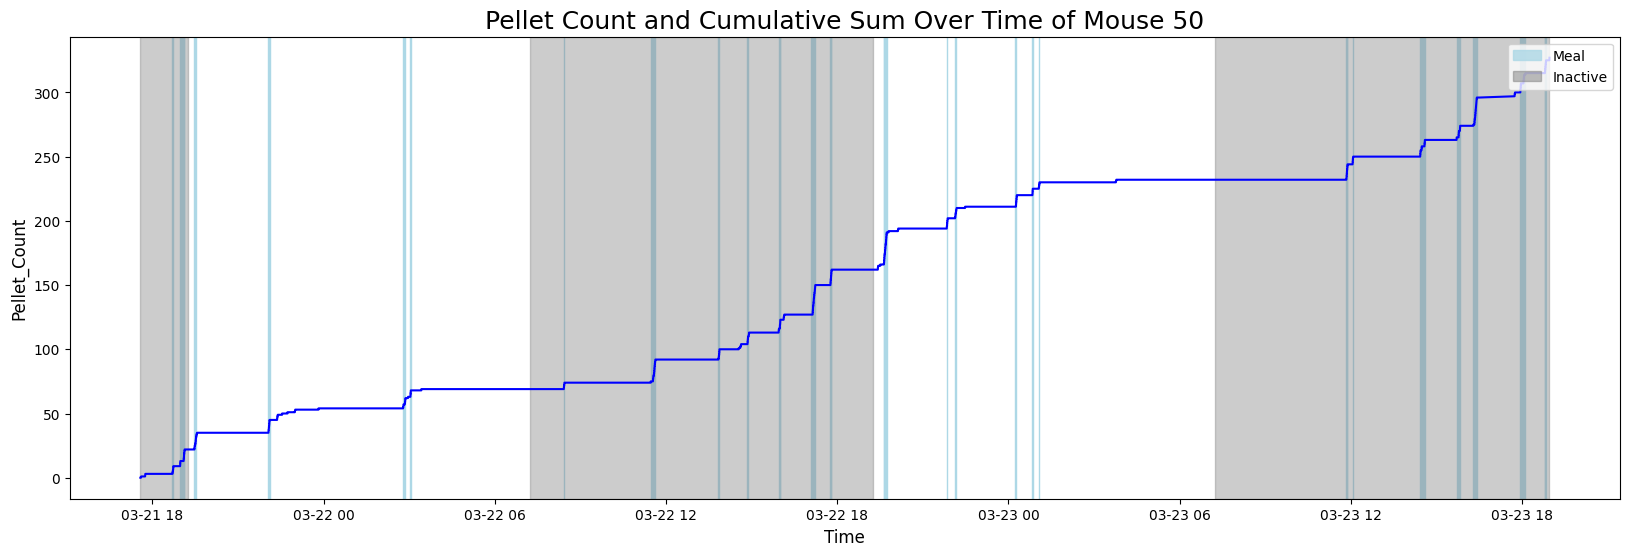

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CD1 IVSA/41/Reversal/FED000_032124_01.CSV


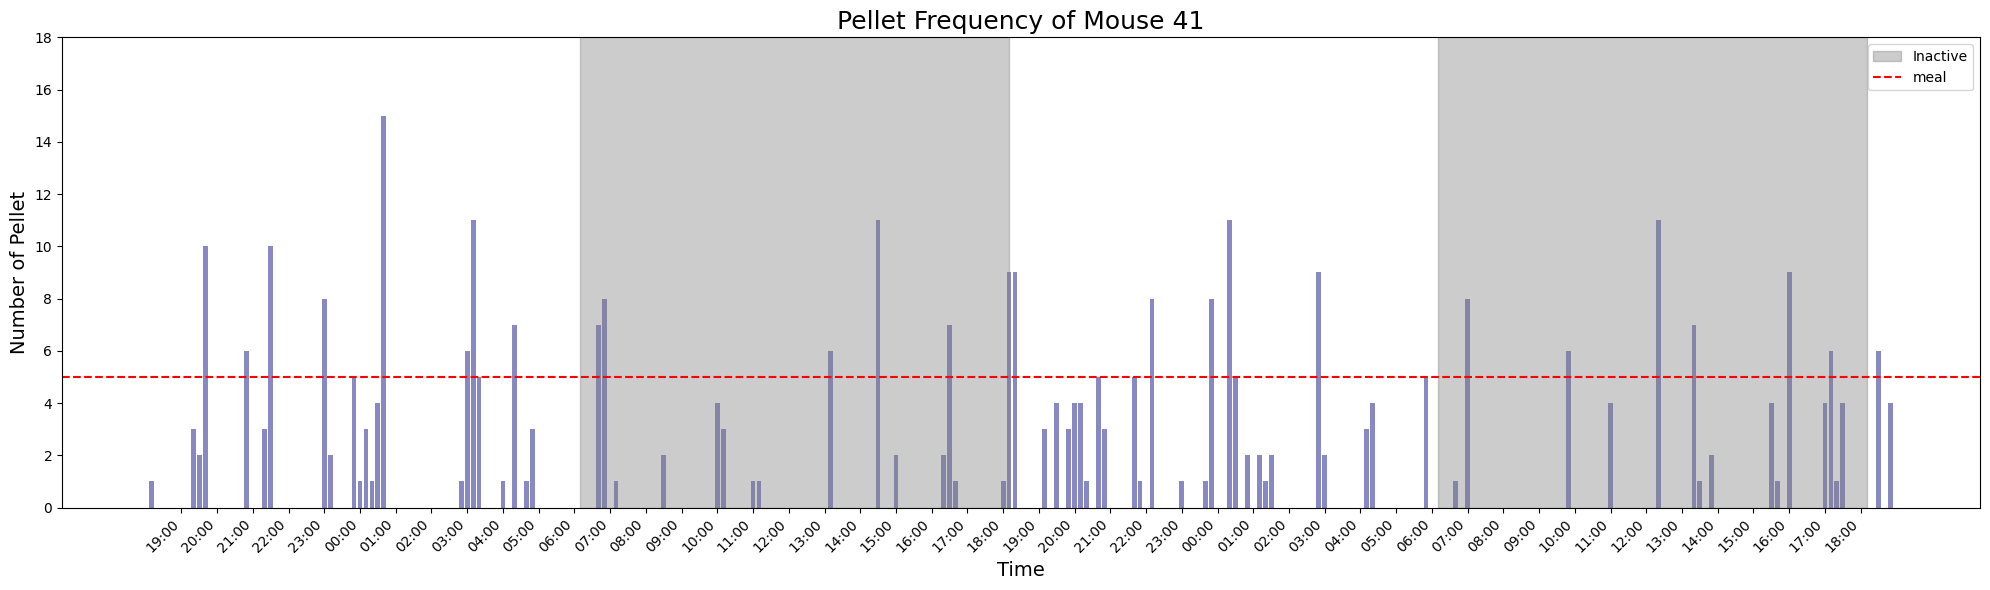

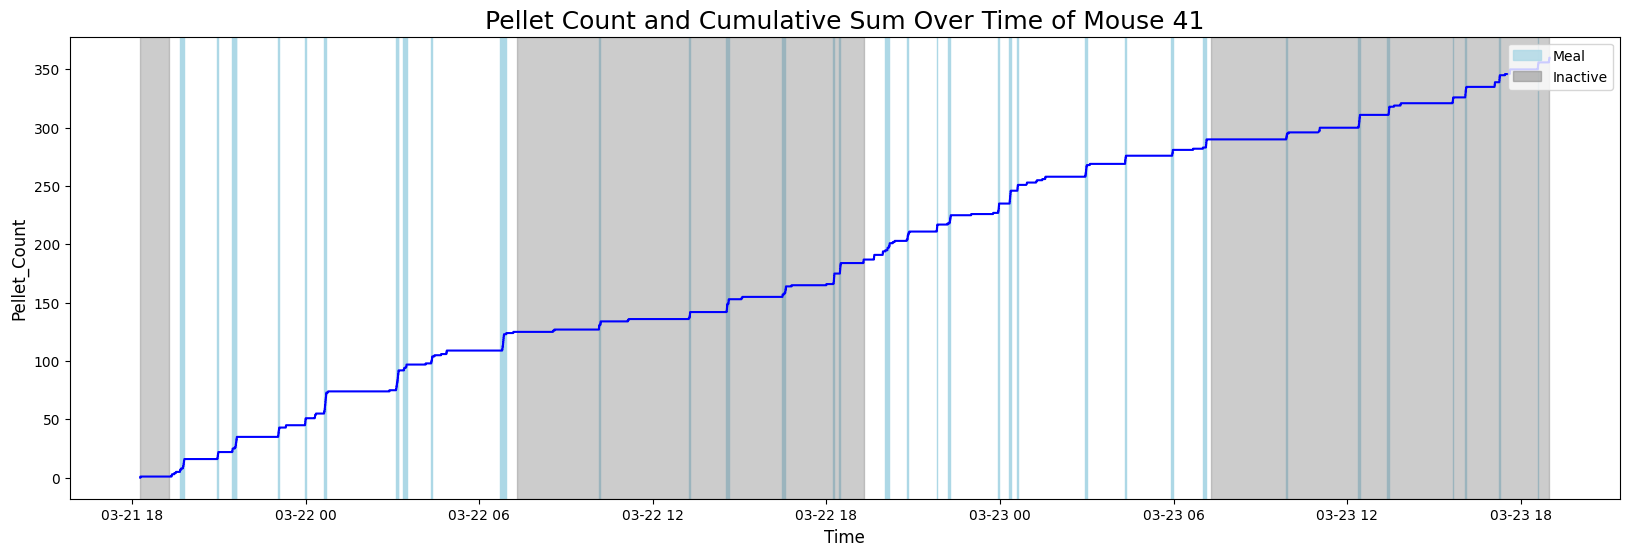

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CD1 IVSA/53/Reversal/FED000_032124_02.CSV


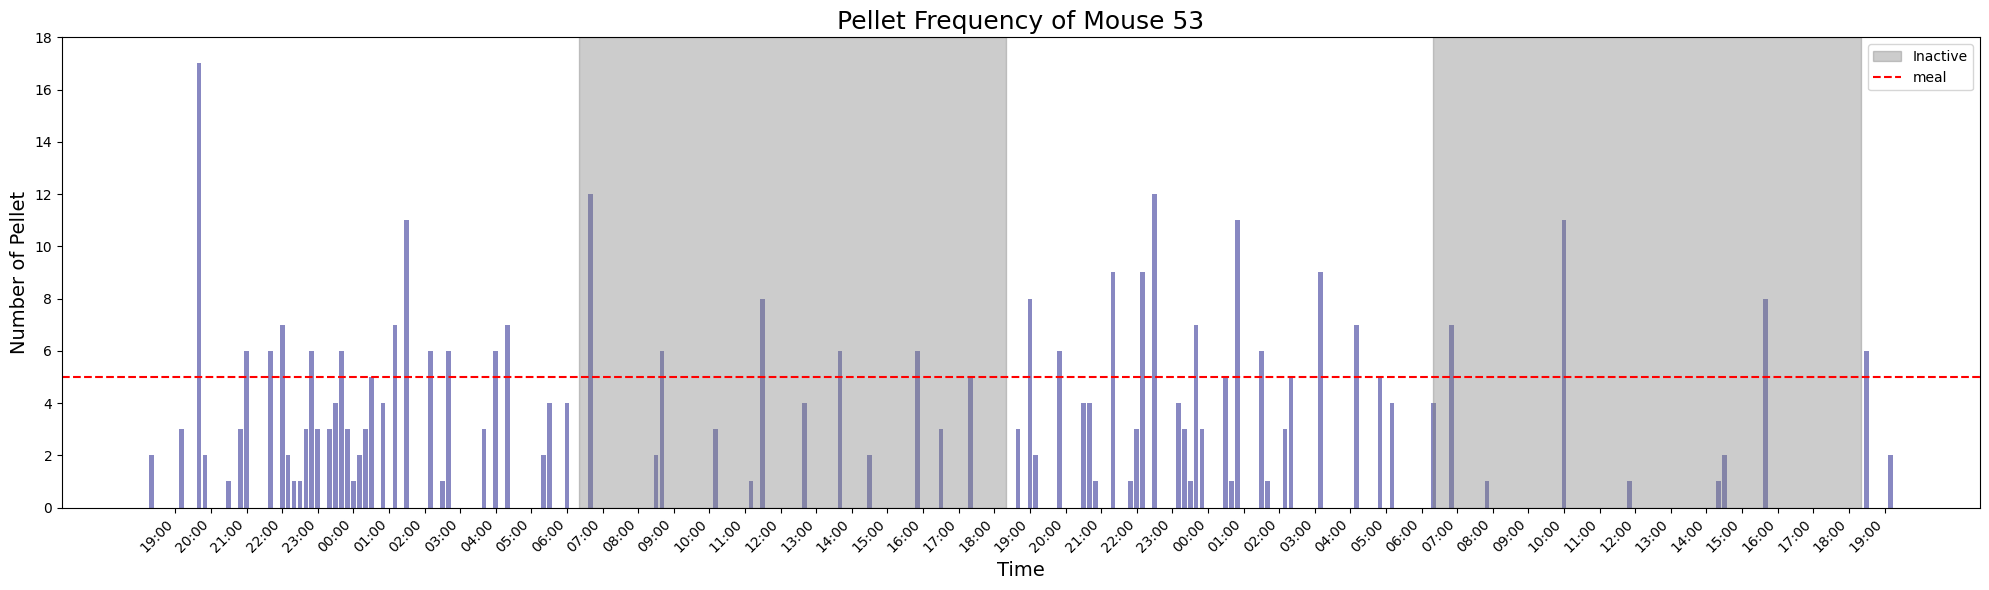

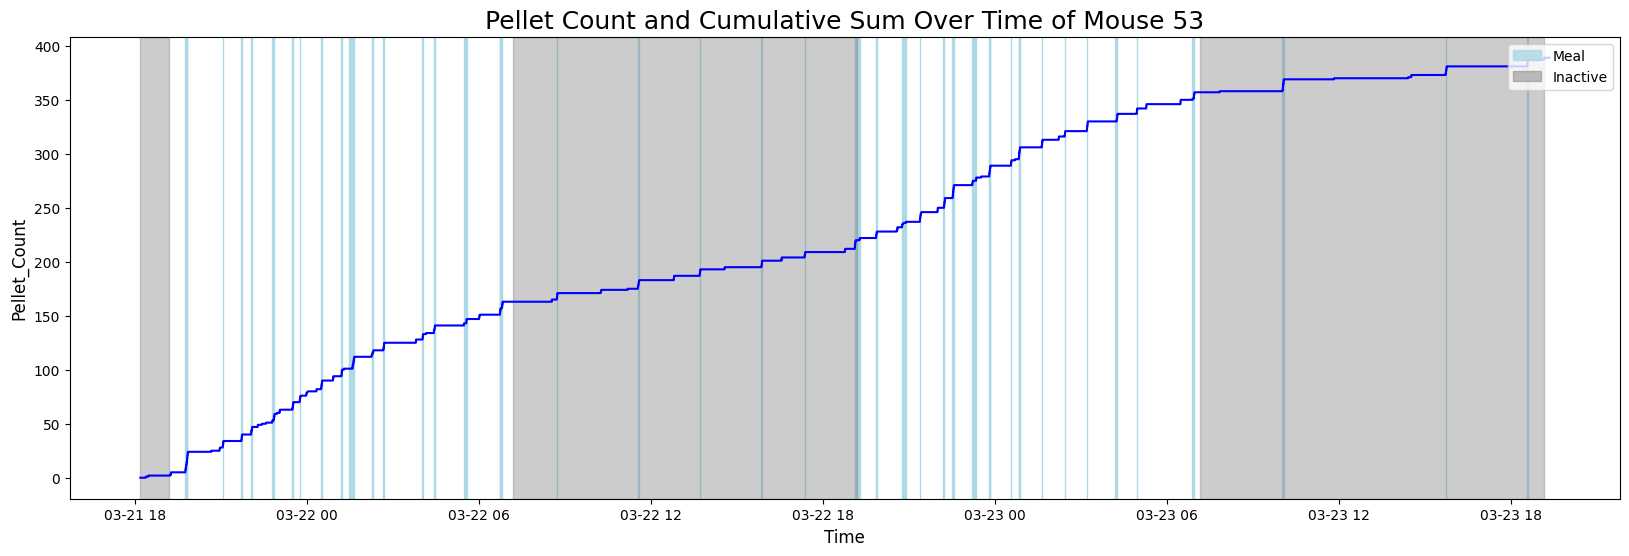

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CD1 IVSA/44/Reversal/FED000_032124_03.CSV


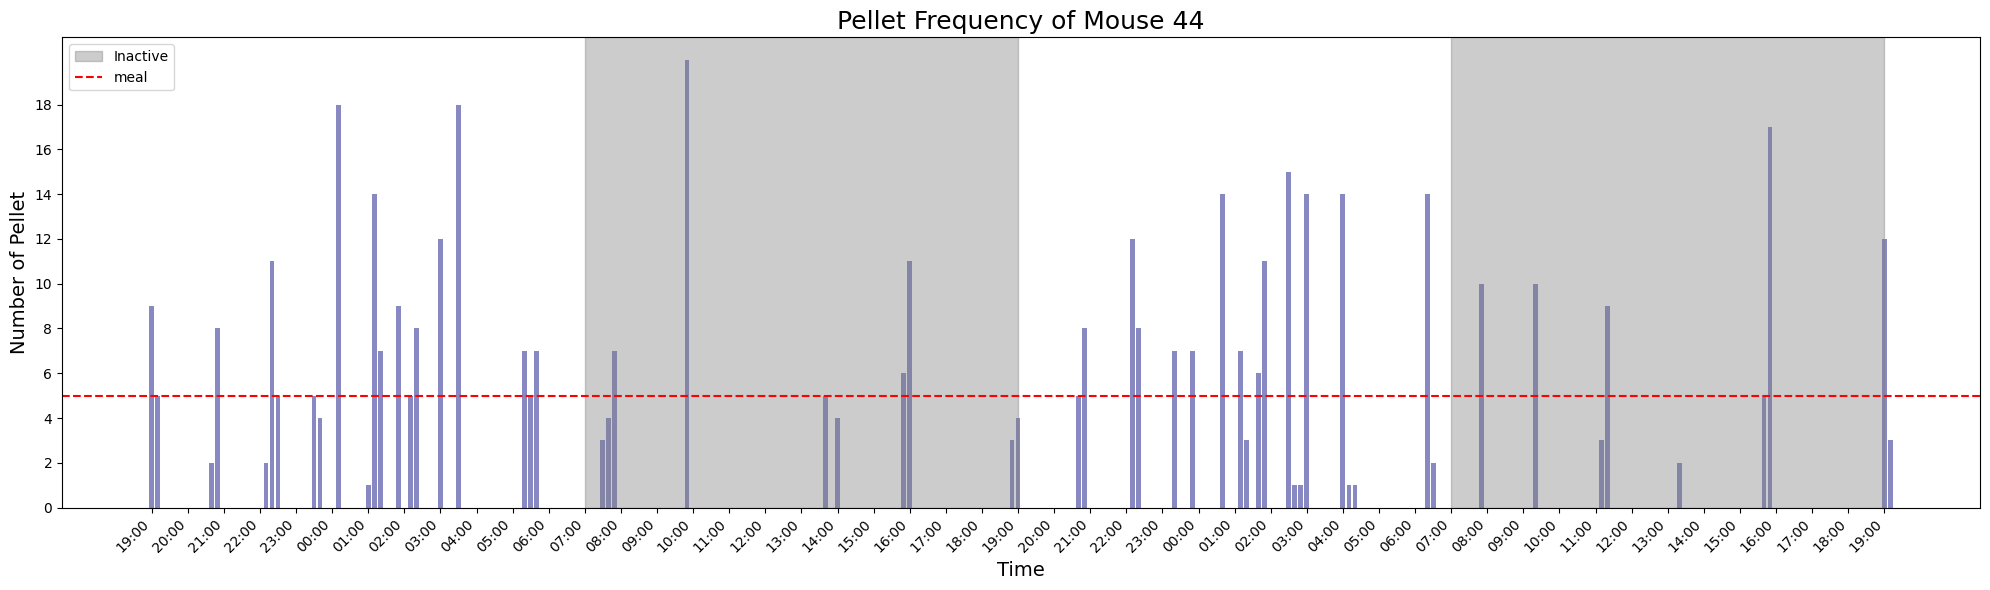

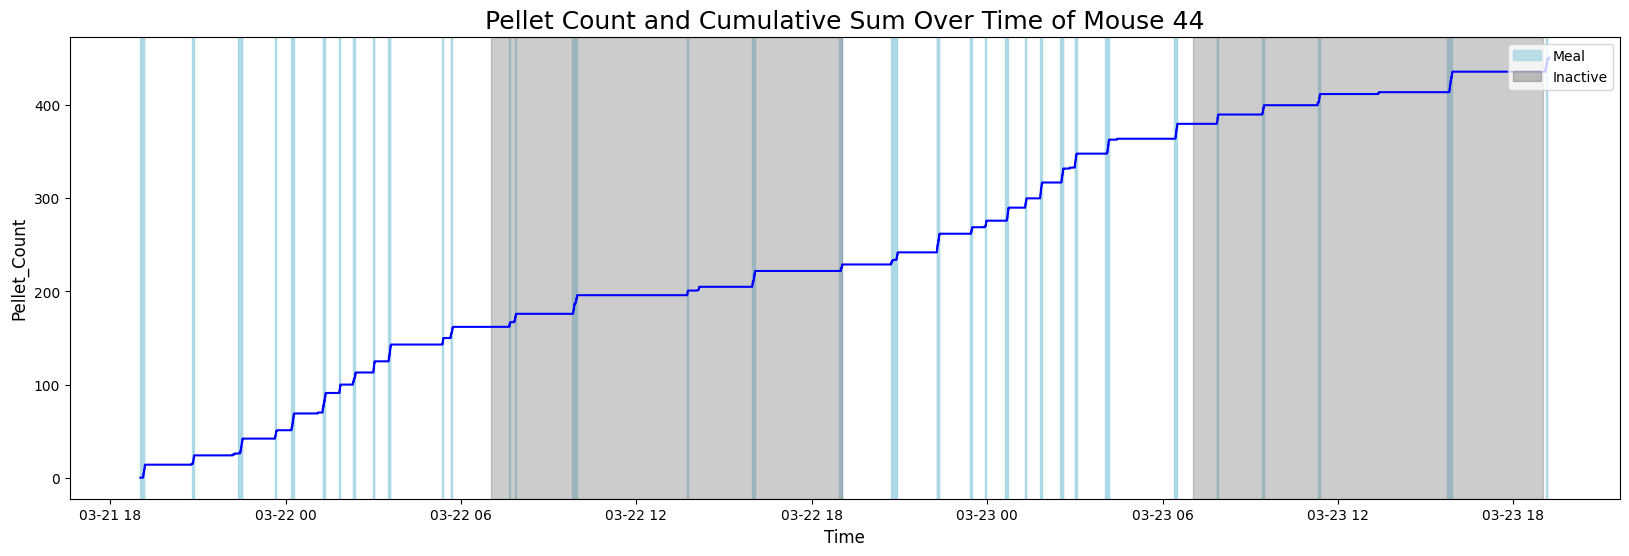

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CD1 IVSA/51/Reversal/FED000_032124_04.CSV


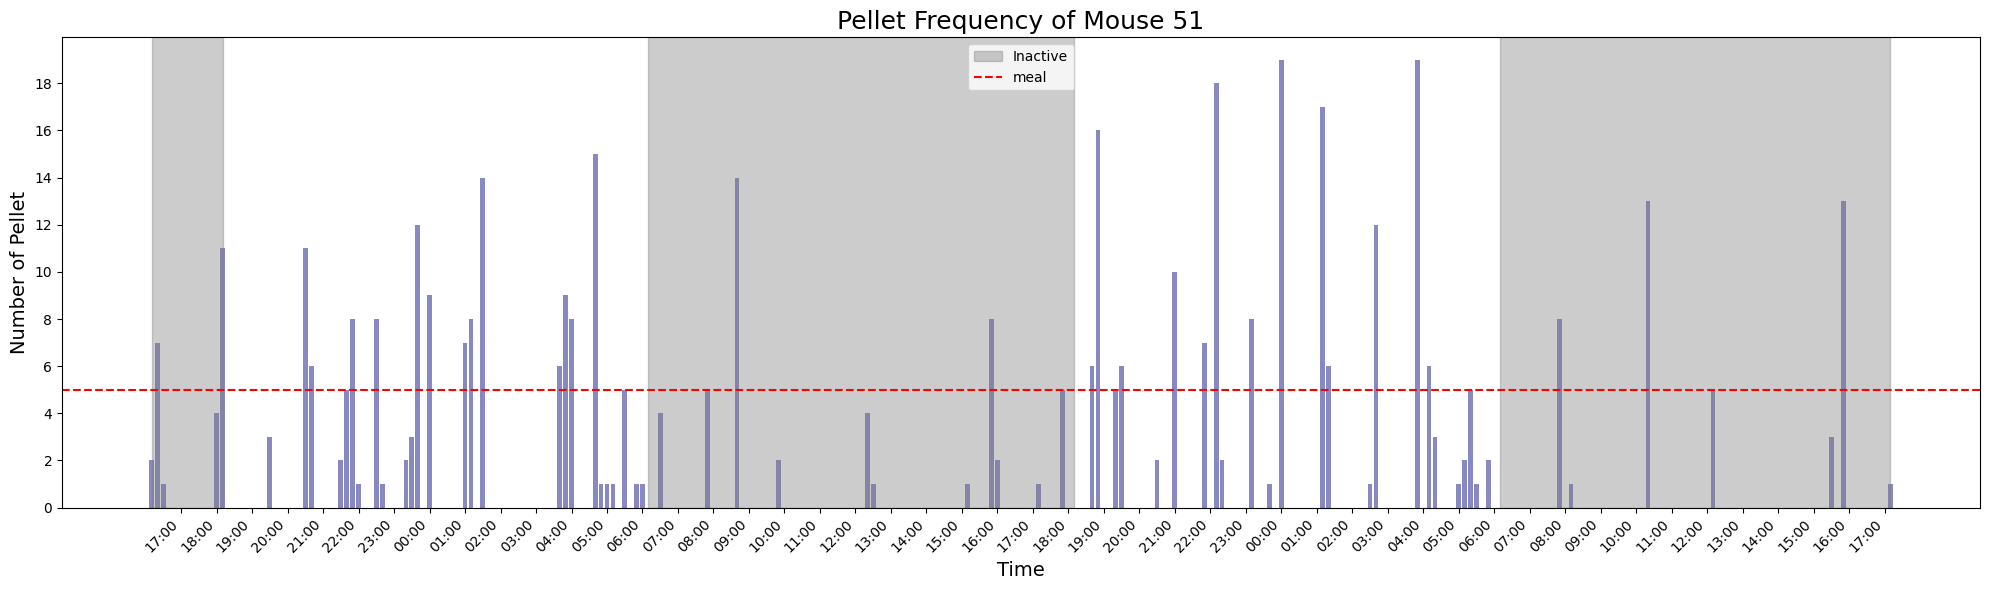

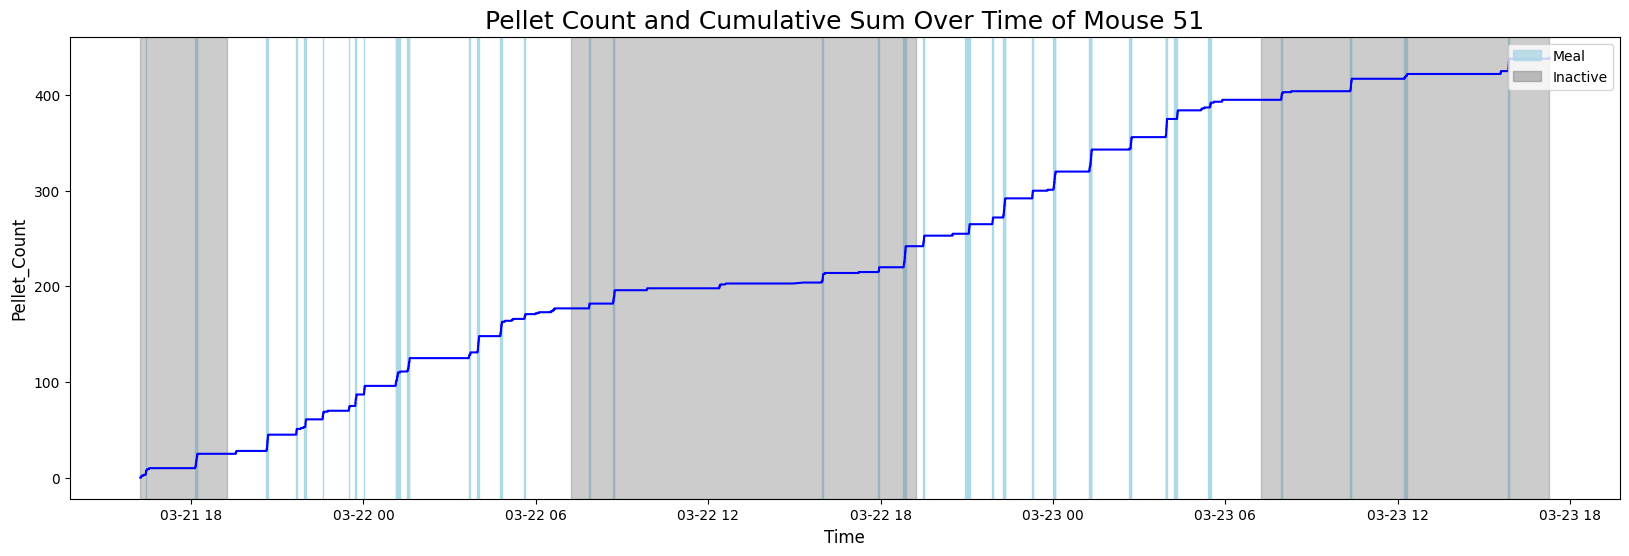

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CD1 IVSA/45/Reversal/FED000_032124_13.CSV


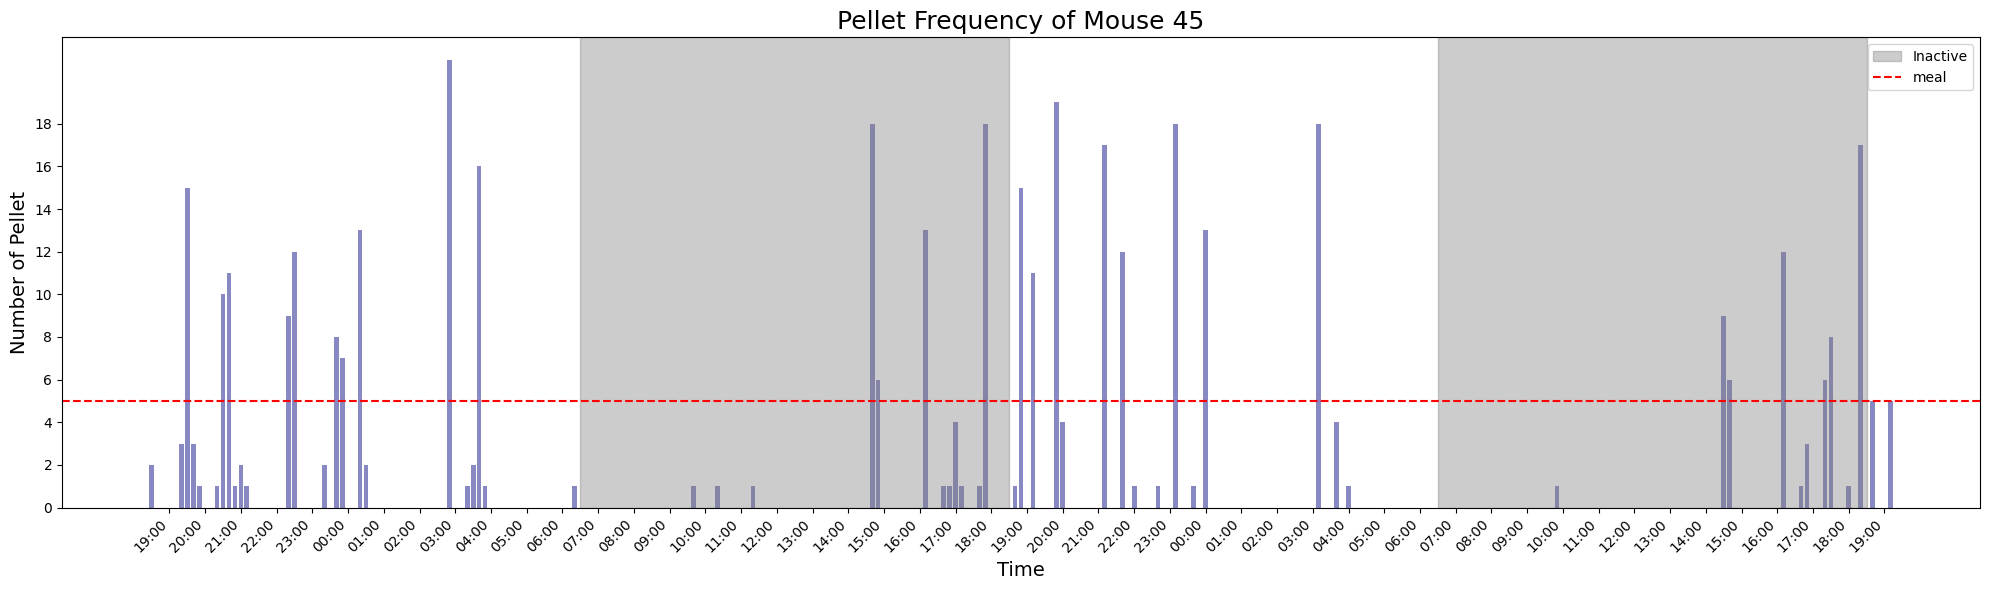

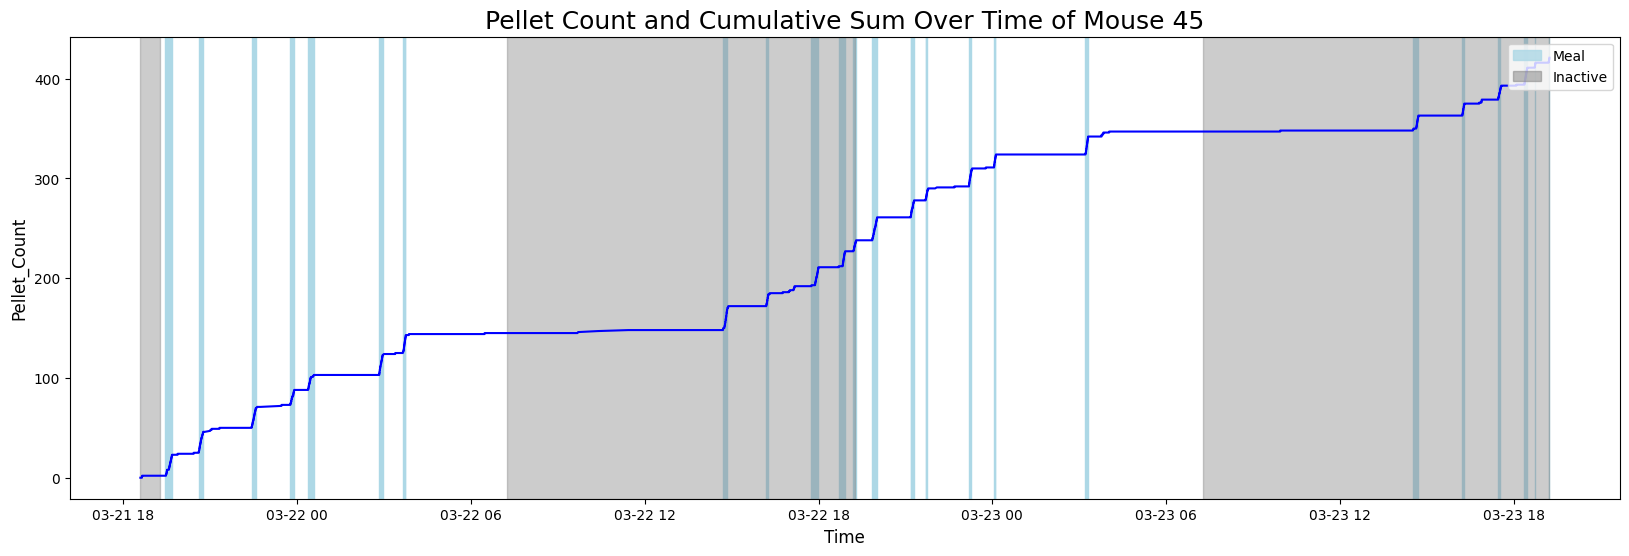

In [3]:
ctrl_avg_pellet = [] # pellet per hour
ctrl_dark_meals = [] # percentage of meals in inactive/dark phase
ctrl_fir_meal = []
for path in paths.reversal_ivsa_ctrl:
    try:
        print(path)
        data = read_csv_clean(path, remove_trivial=False)
        meal = ml.find_meals(data)
        group = ml.pellet_flip(data)
        num = tl.get_bhv_num(path)[0]
        ctrl_avg_pellet.append(ml.average_pellet(group))
        ctrl_dark_meals.append(ml.active_meal(meal))
        meal_1 = (meal[0][0] - data['Time'][0]).total_seconds() / 60
        ctrl_fir_meal.append(meal_1)
        ml.graph_pellet_frequency(group, None, num)
        ml.graphing_cum_count(data, meal, None, num, flip=True)
    except:
        pass

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CD1 IVSA/54/Reversal/FED000_032124_07.CSV


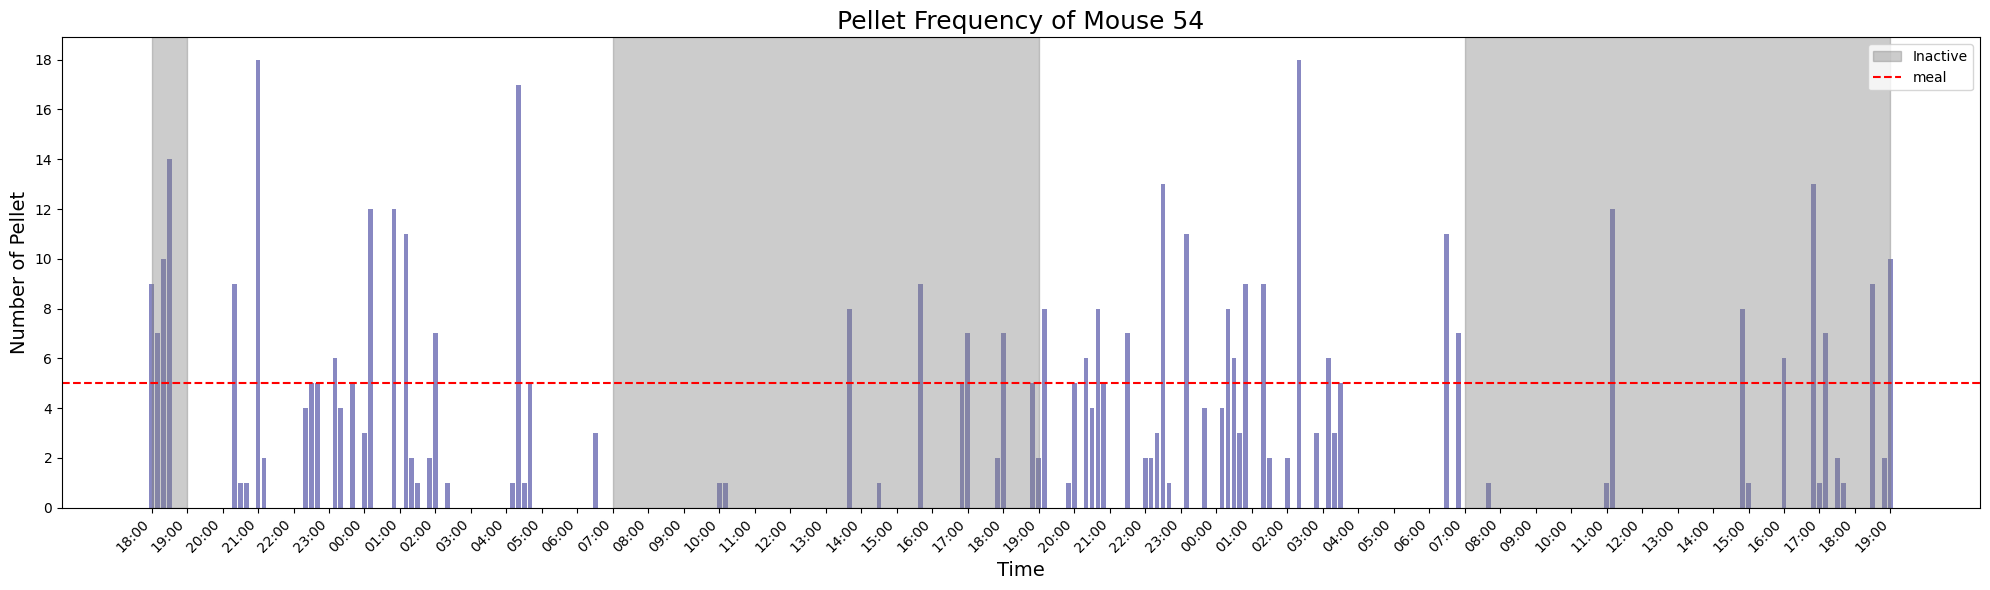

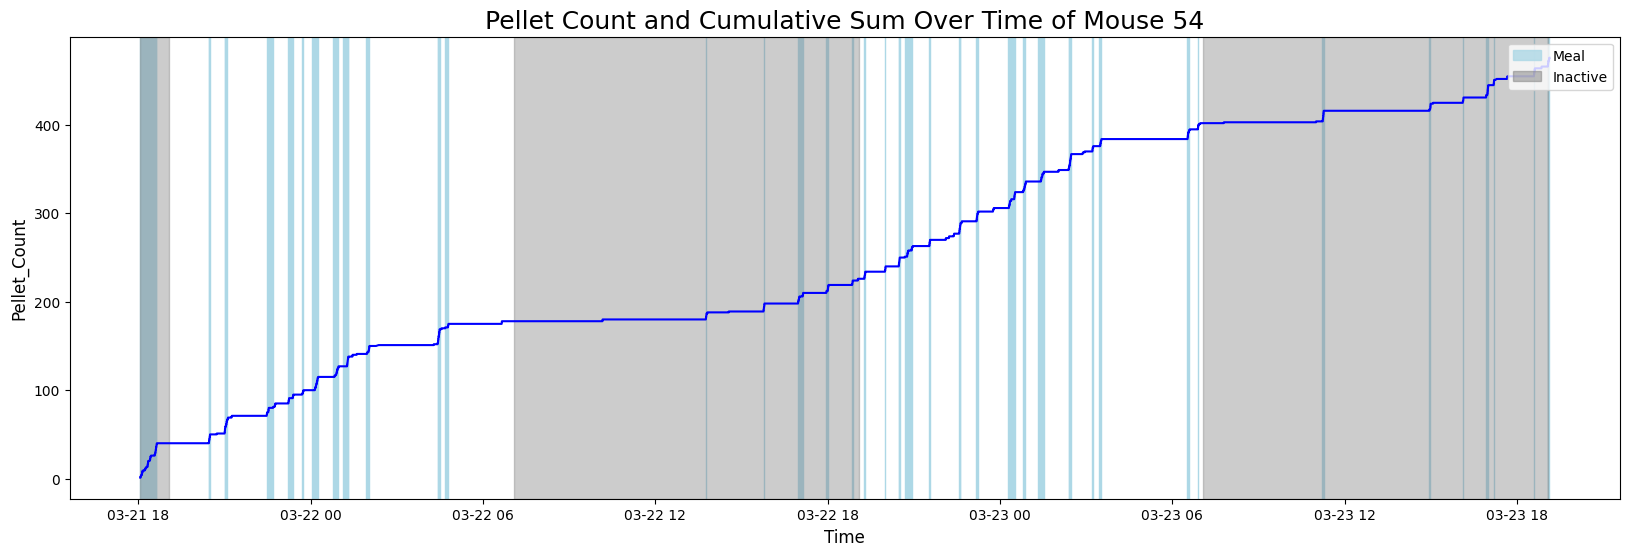

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CD1 IVSA/55/Reversal/FED000_032124_04.CSV


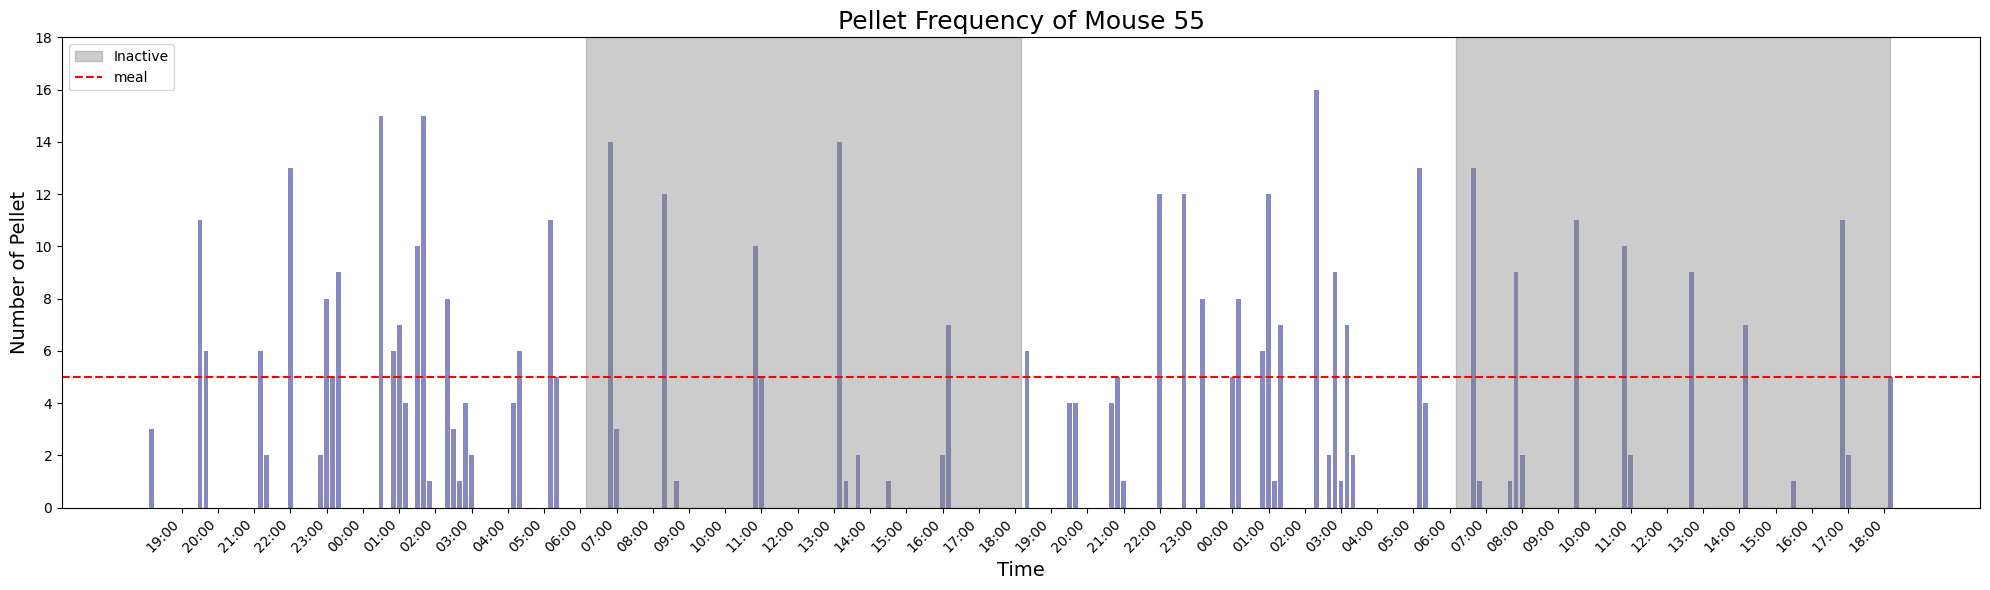

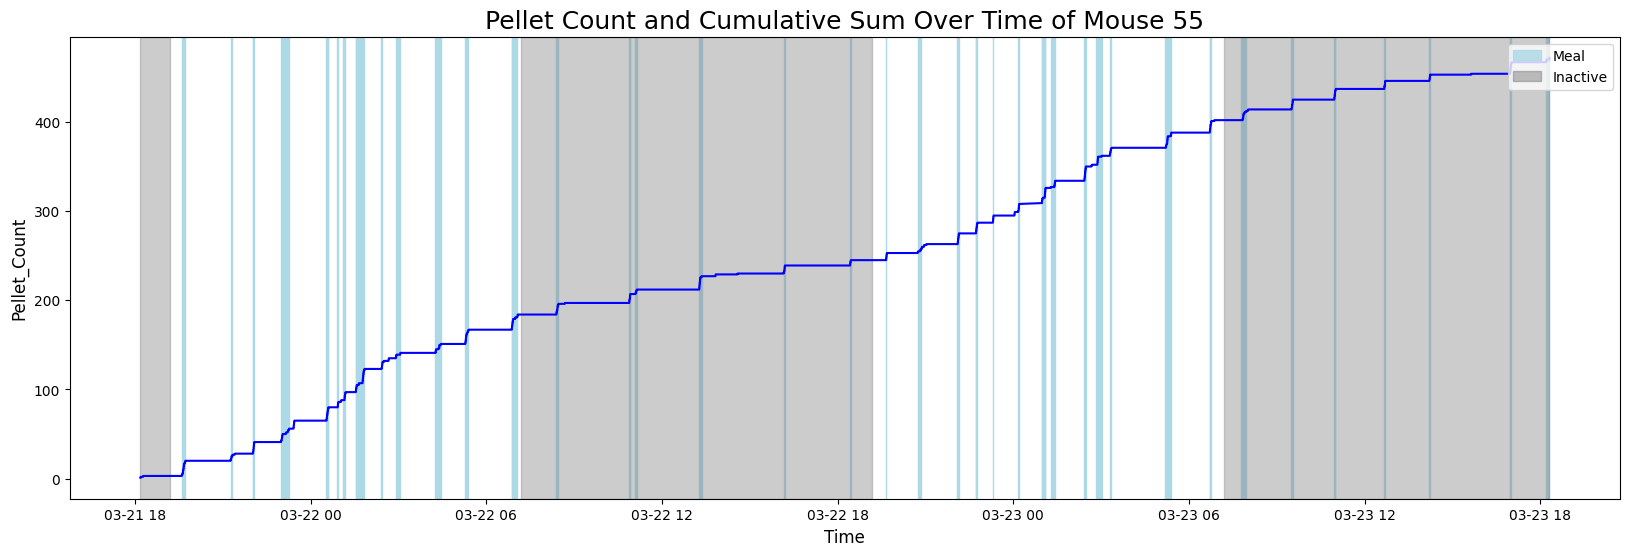

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CD1 IVSA/46/Reversal/FED000_032224_03.CSV


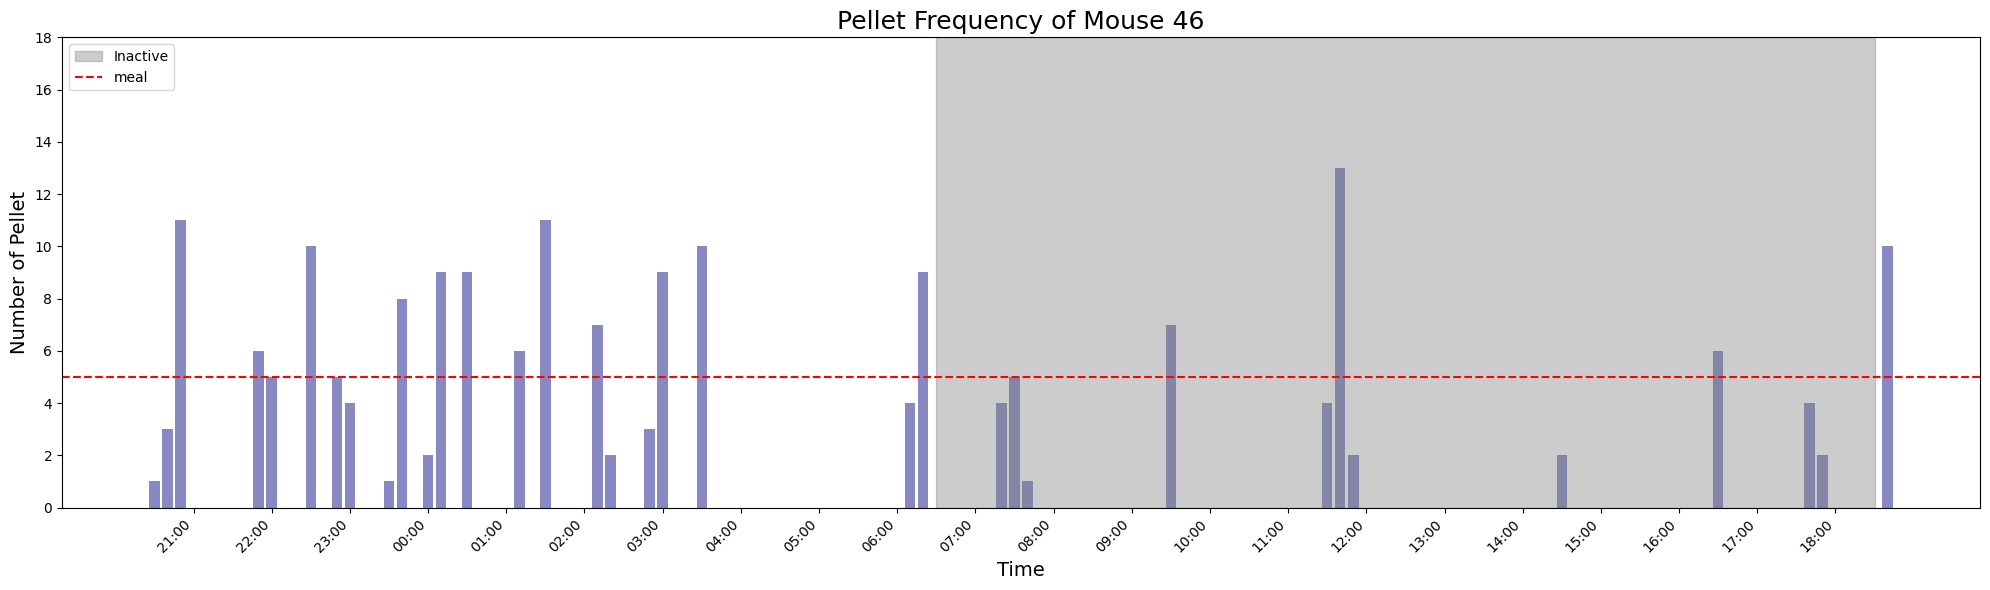

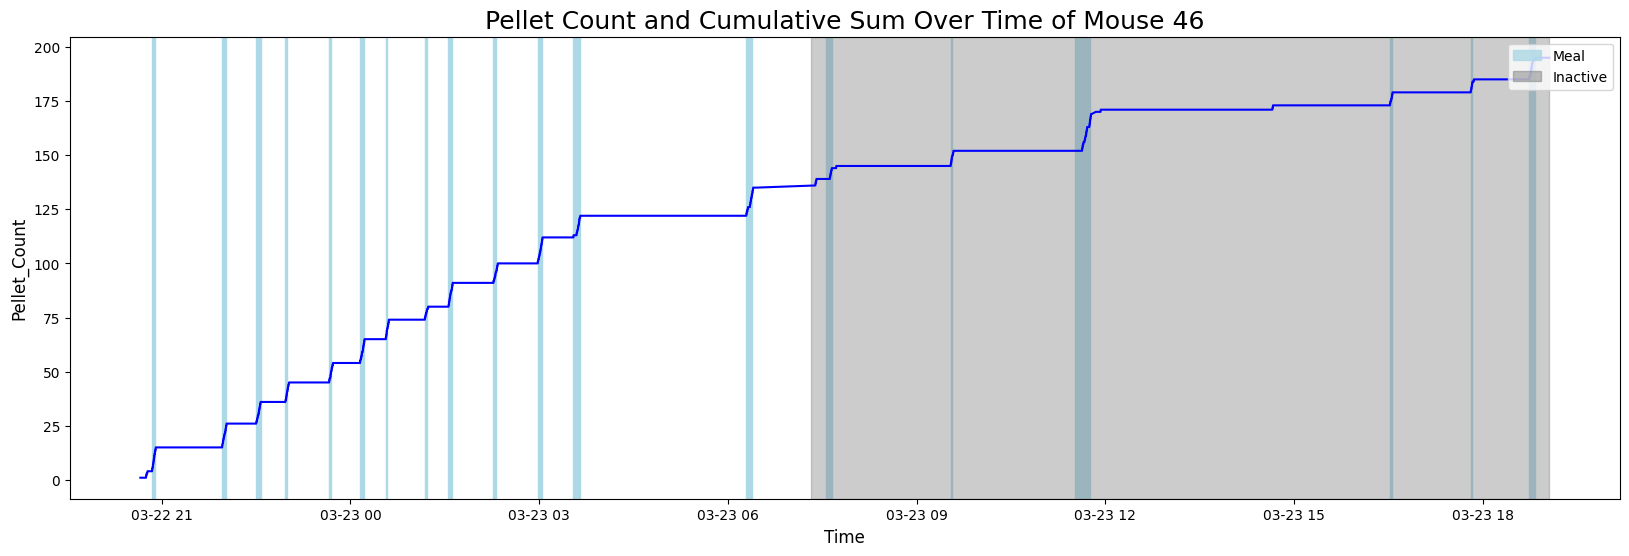

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CD1 IVSA/47/Reversal/FED000_032124_02.CSV


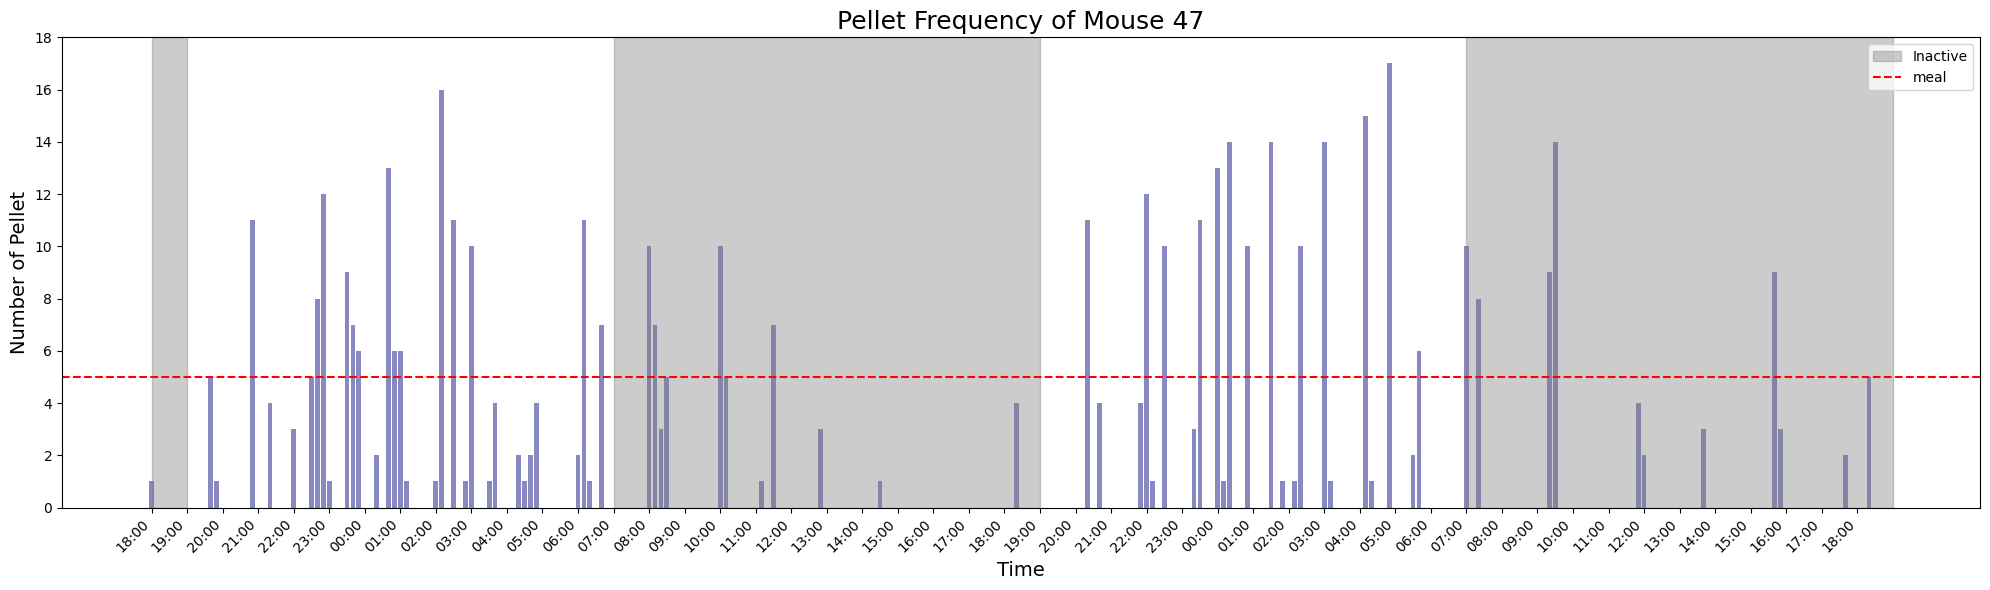

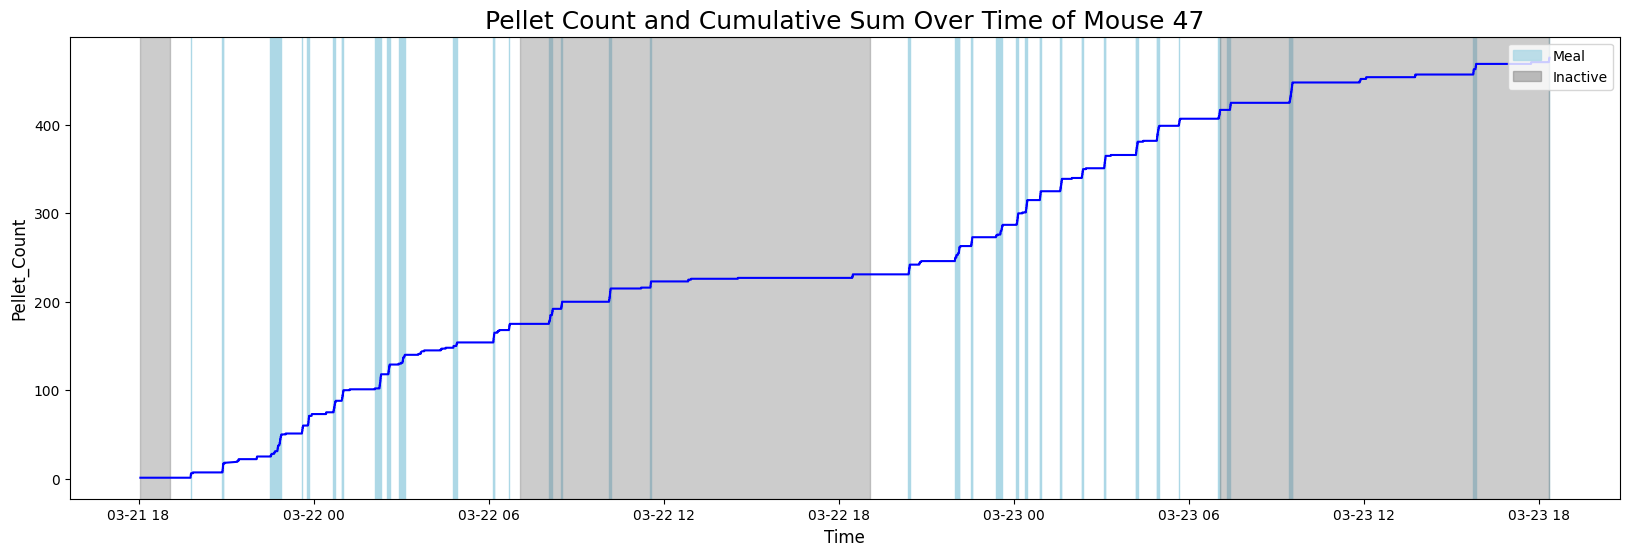

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CD1 IVSA/57/Reversal/FED000_032124_03.CSV


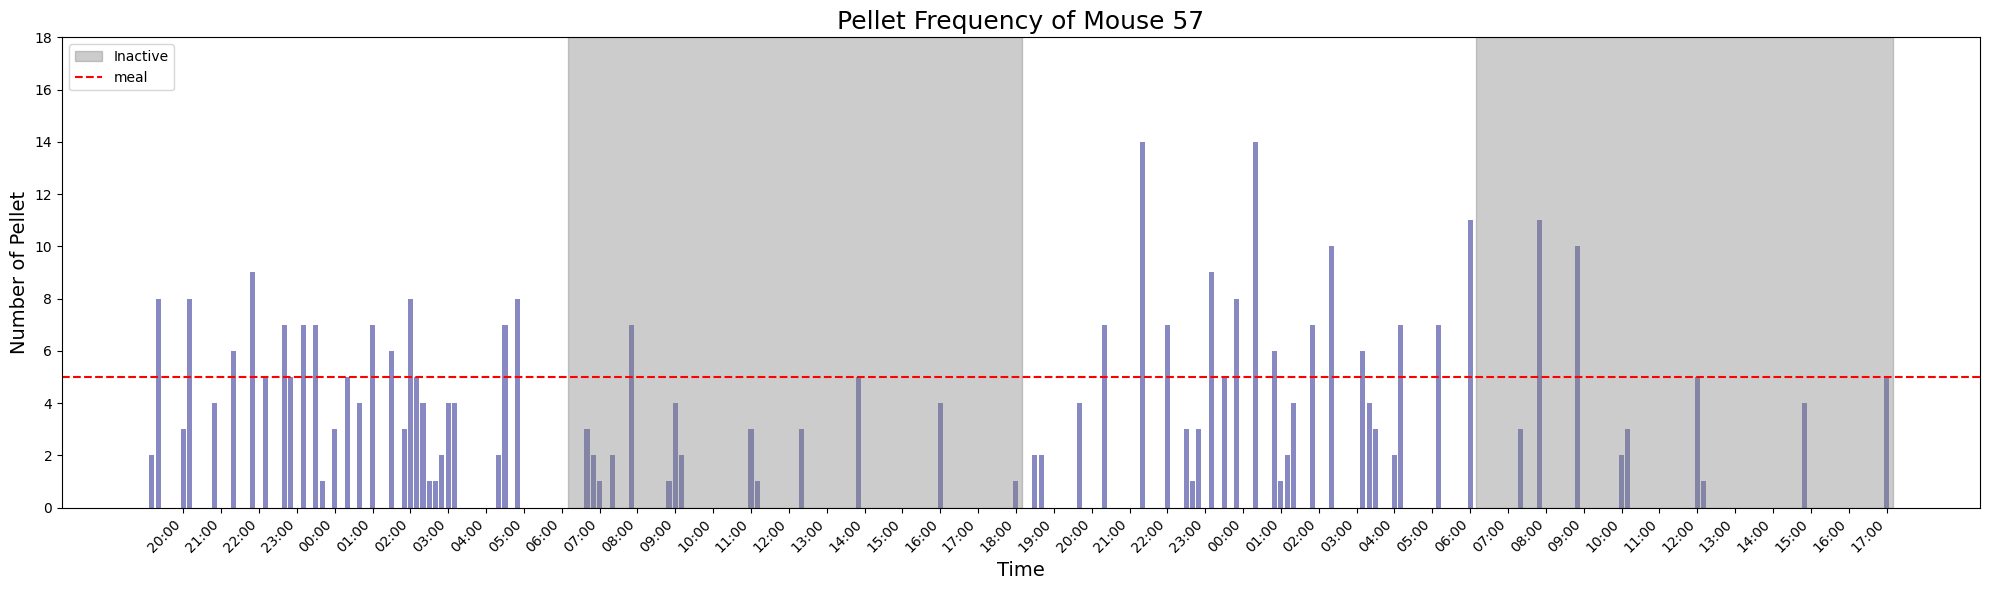

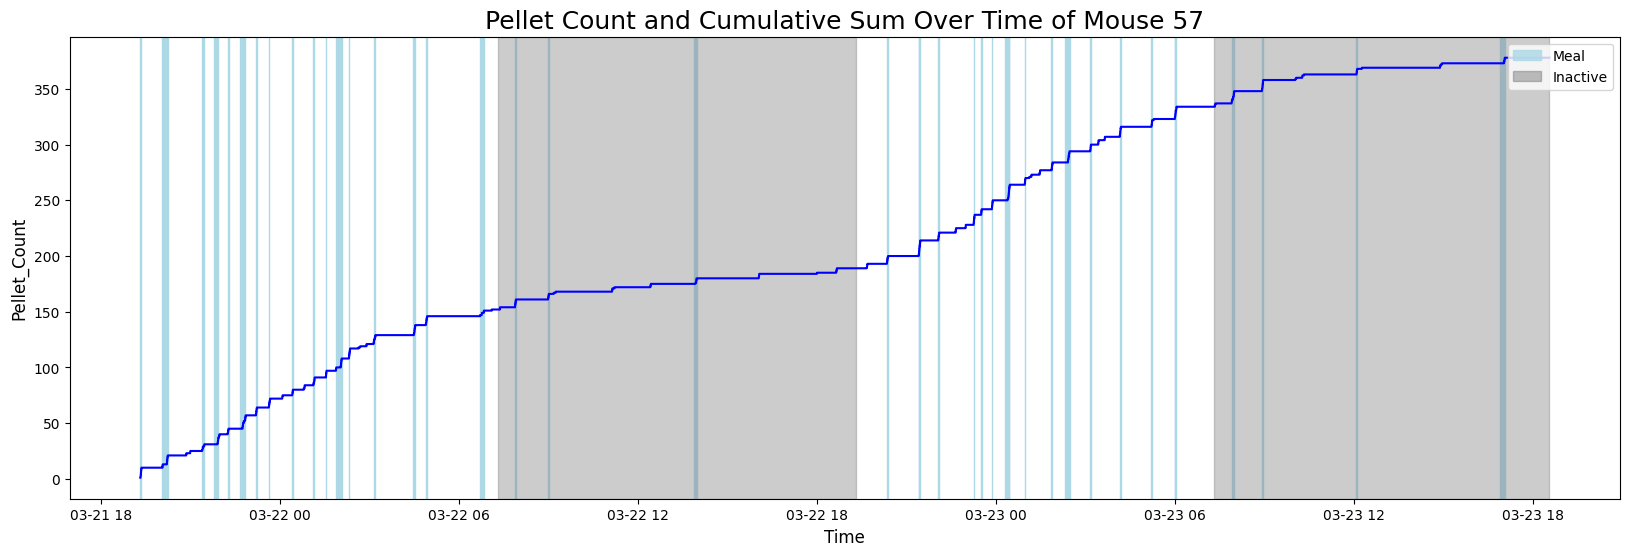

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CD1 IVSA/49/Reversal/FED000_032124_05.CSV


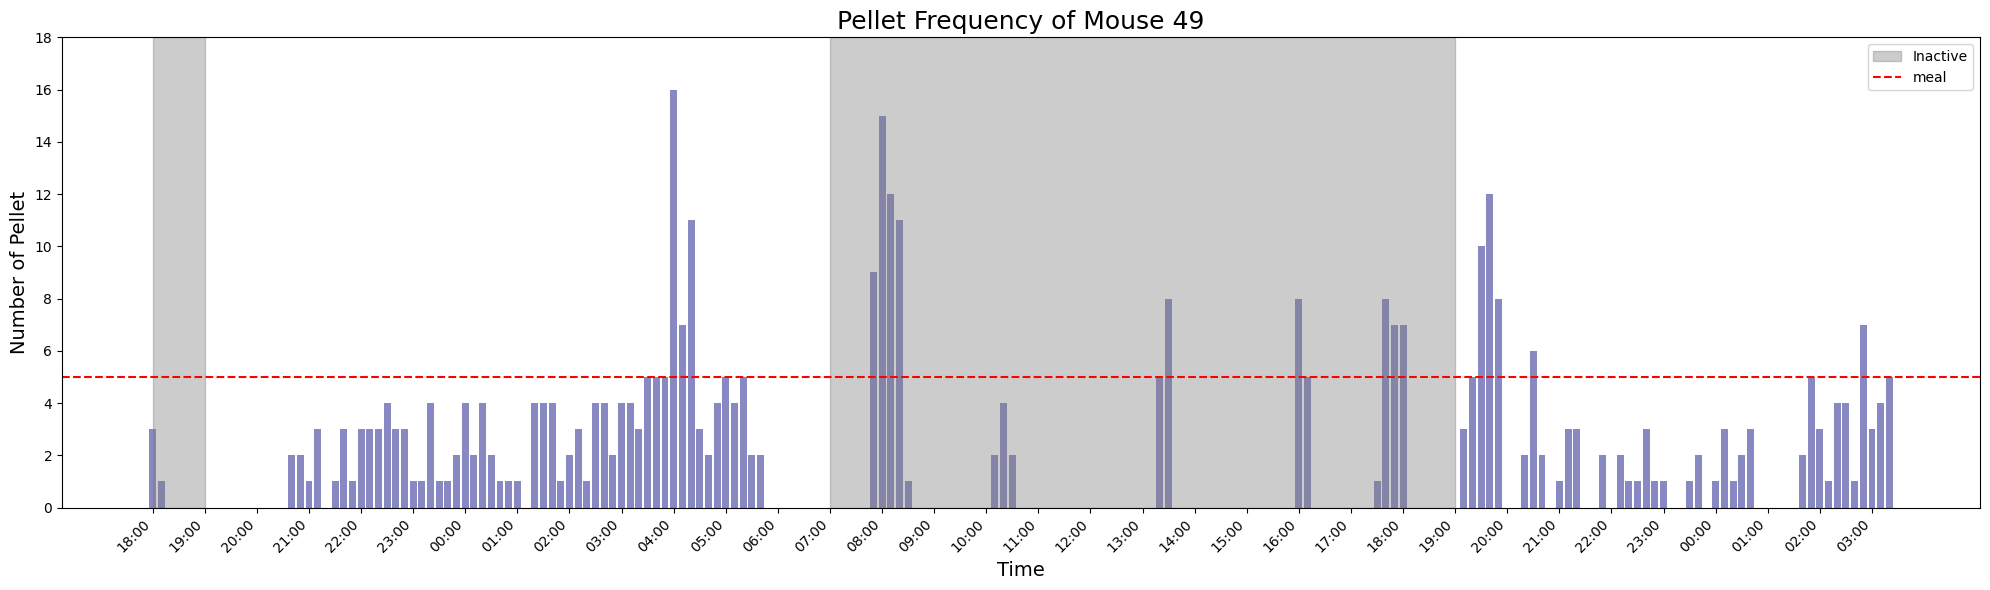

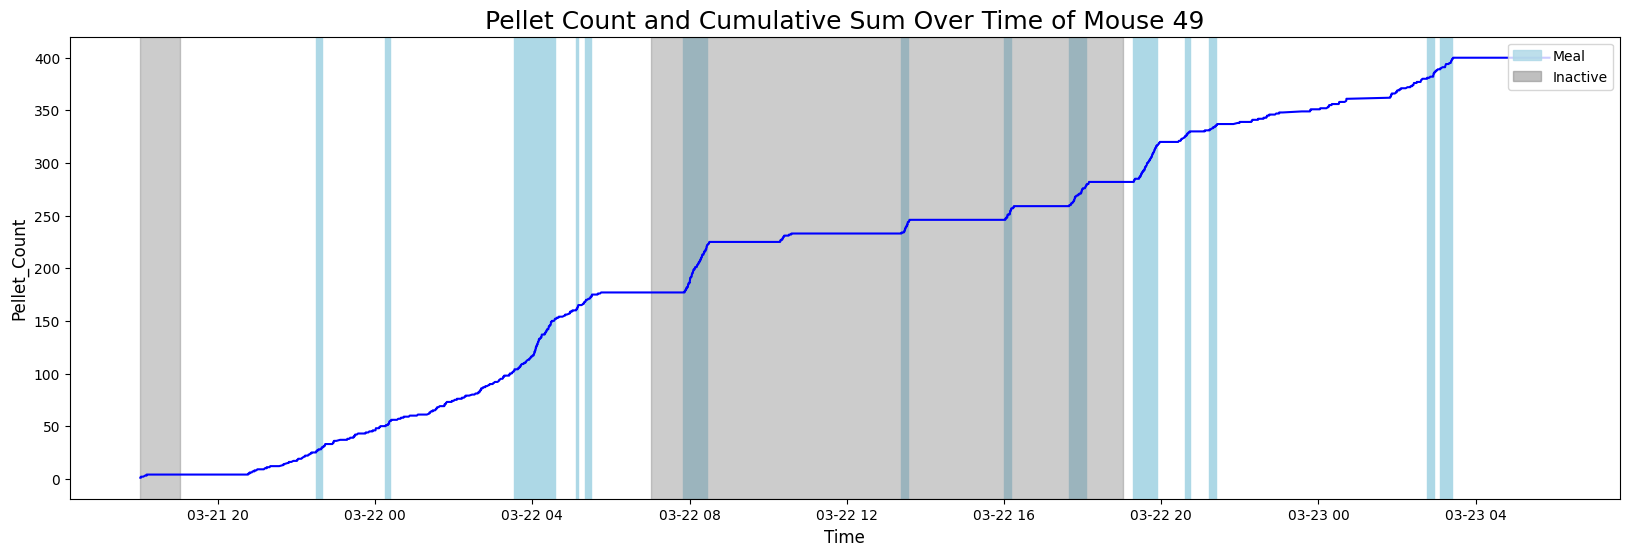

/home/ftlab/Desktop/For_Andy/FED3-data/behavior data integrated/CD1 IVSA/56/Reversal/FED000_032124_02.CSV


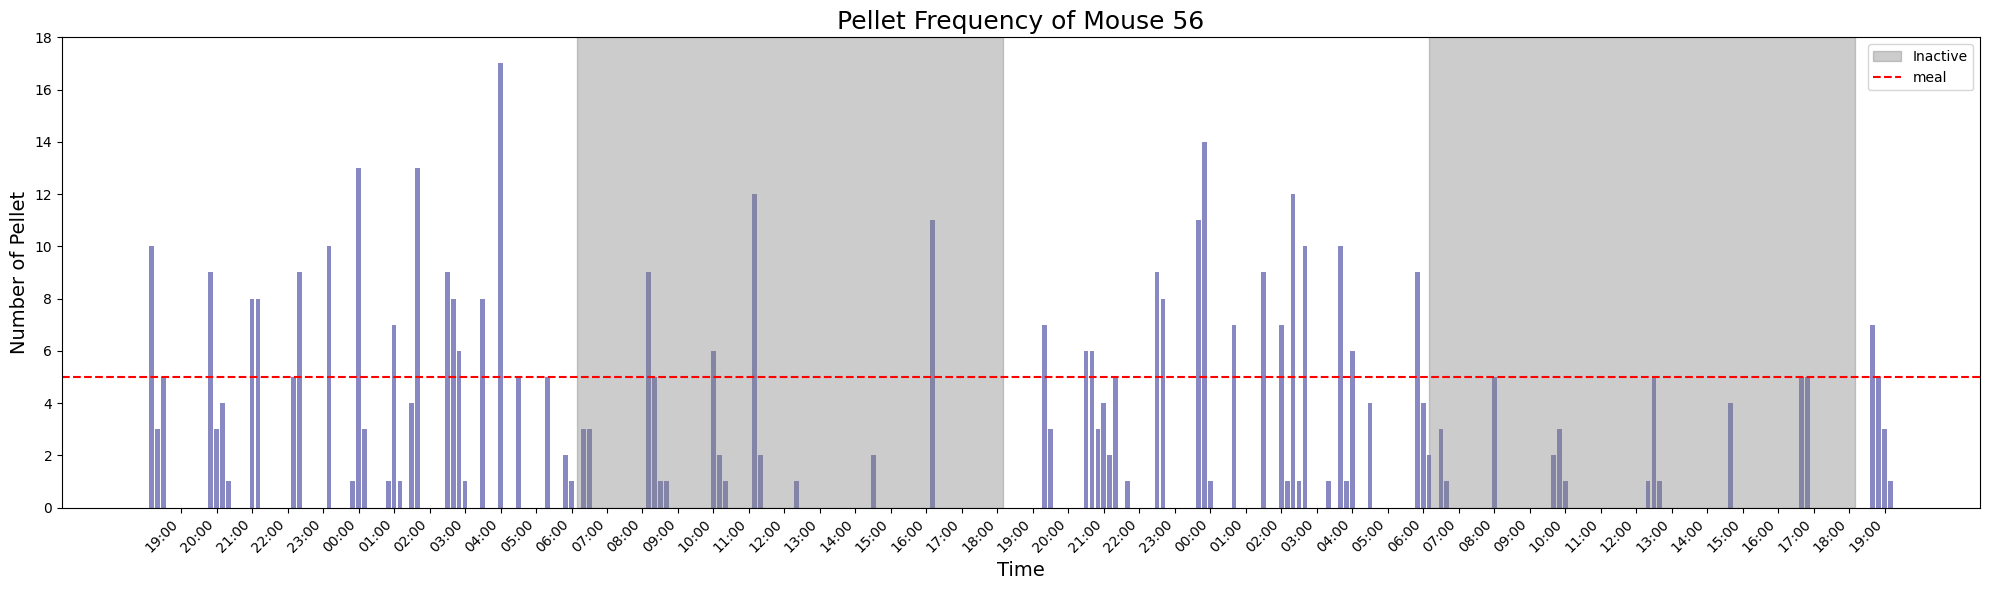

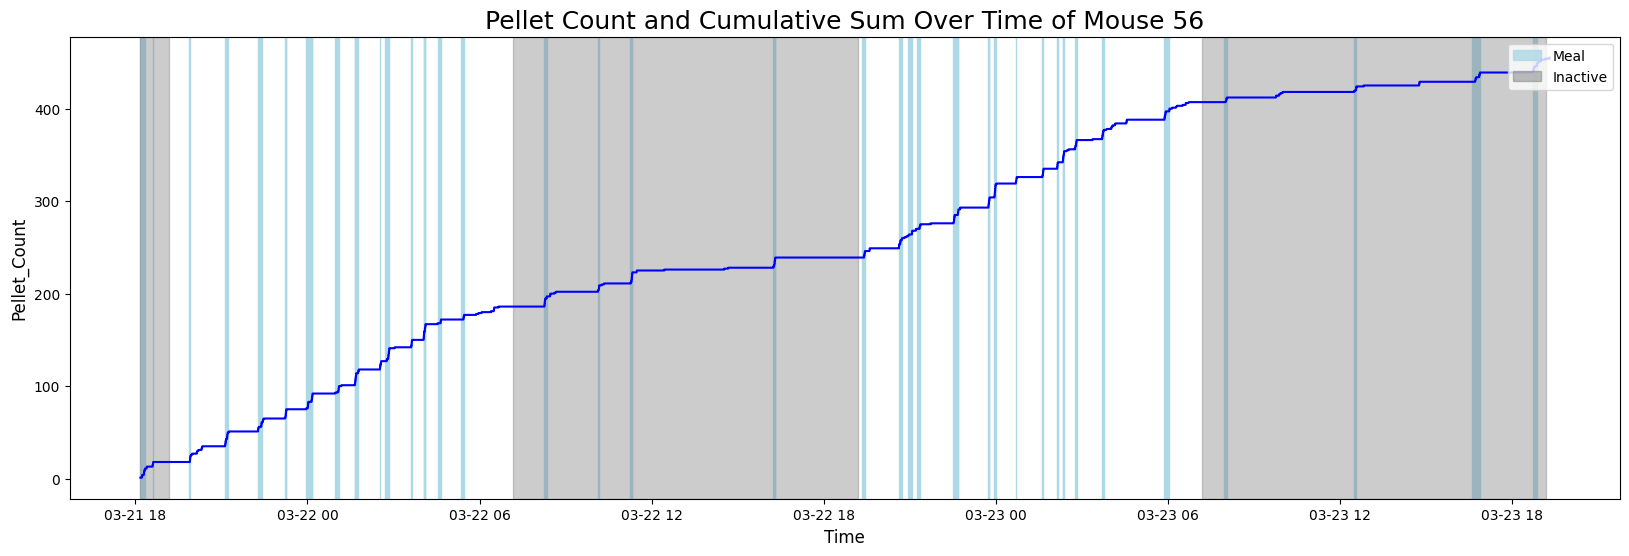

In [4]:
exp_avg_pellet = [] # pellet per hour
exp_dark_meals = [] # percentage of meals in inactive/dark phase
exp_fir_meal = []
for path in paths.reversal_ivsa_exp:
    print(path)
    data = read_csv_clean(path)
    meal = ml.find_meals(data)
    group = ml.pellet_flip(data)
    num = tl.get_bhv_num(path)[0]
    exp_avg_pellet.append(ml.average_pellet(group))
    exp_dark_meals.append(ml.active_meal(meal))
    meal_1 = (meal[0][0] - data['Time'][0]).total_seconds() / 60
    exp_fir_meal.append(meal_1)
    ml.graph_pellet_frequency(group, None, num)
    ml.graphing_cum_count(data, meal, None, num, flip=True)

In [5]:
ctrl_avg_pellet, exp_avg_pellet

([6.628, 7.397, 7.966, 9.363, 8.959, 8.651],
 [9.714, 9.833, 8.797, 9.848, 8.247, 12.0, 9.286])

In [6]:
ctrl_dark_meals, exp_dark_meals

([0.3469, 0.6522, 0.8163, 0.72, 0.7121, 0.6618],
 [0.7042, 0.7123, 0.7, 0.75, 0.8261, 0.6047, 0.75])

In [7]:
import intervals as invs

invs.perform_T_test(ctrl_avg_pellet, exp_avg_pellet, test_side='greater')

P Value is  0.016484671801691175
Experiment group is significantly greater than control group


In [8]:
invs.perform_T_test(ctrl_dark_meals, exp_dark_meals, test_side='greater')

P Value is  0.15796811933443083
There is no significant difference between the two groups.


In [10]:
invs.perform_T_test(ctrl_meal_count, exp_meal_count)

P Value is  0.6181719328848685
There is no significant difference between the two groups.


Control Size: 6
PICA Size: 7
Control Average: 8.160666666666666
PICA Average: 9.674999999999999
Control Standard Deviation: 1.028933169193542
PICA Standard Deviation: 1.1848648305467873


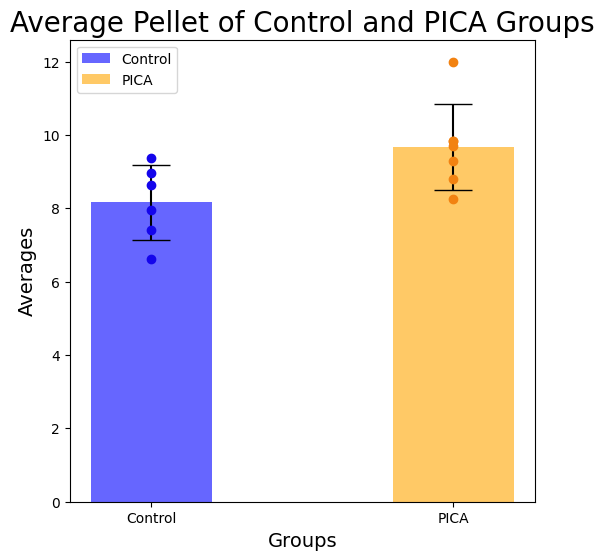

In [9]:
ml.graph_average_pellet(ctrl_avg_pellet, exp_avg_pellet, exp_name='PICA')

In [8]:
invs.perform_T_test(ctrl_fir_meal, exp_fir_meal)

P Value is  0.7236979889126083
There is no significant difference between the two groups.


Control Size: 6
PICA Size: 7
Control Average: 51.04999999999999
PICA Average: 66.67857142857143
Control Standard Deviation: 38.220294202019026
PICA Standard Deviation: 98.89276399131167


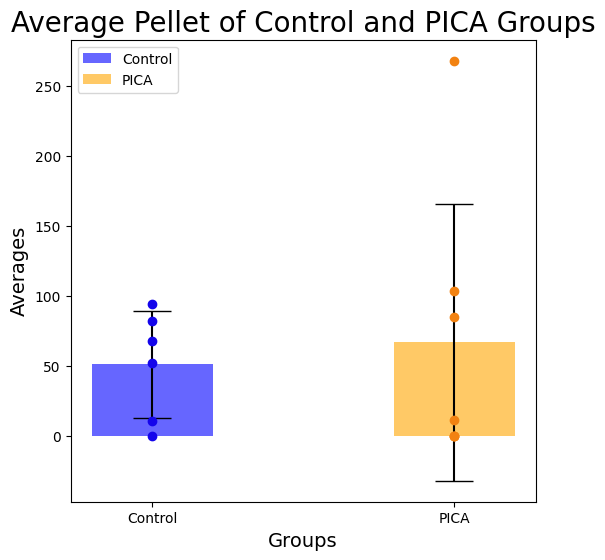

In [5]:
ml.graph_average_pellet(ctrl_fir_meal, exp_fir_meal, exp_name='PICA')